#### Load modules

Install Detectron2 from [Facebook's Research Github](https://github.com/facebookresearch/detectron2) and, Imprep preferably, in a new conda environment.



In [4]:
import os
import cv2
import random
from imageprep import coco
import numpy as np
import detectron2
import json
from detectron2.utils.logger import setup_logger
setup_logger()


from detectron2.structures import BoxMode
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

Detectron2 Requires each bounding box to have structure mode and since is a unique case, here is a update the dictionary returned with imprep.


In [26]:
image_path ='datasets/planes/plane_train_images/'
label_path = 'datasets/planes/plane_train_labels/'
data_dict = coco.coco_format_folder(image_path, label_path)
label_dir = image_path.replace('images','labels')
print(label_dir)

datasets/planes/plane_train_labels/


In [25]:
dataset_dicts = []
for idx, v in enumerate(data_dict):
    record = {}
    file_name = v['image'][0]['file_name']
    height = v['image'][0]['height']
    height = v['image'][0]['width']
    
    annotations = v['annotations']
    objs = []

    for j in range(0, len(annotations)):
        annotations[j]['bbox_mode'] = BoxMode.XYXY_ABS
        annotations[j]['category_id'] = 0
    
    

[{'bbox': [174, 274, 357, 416], 'id': 1, 'segmentation': [], 'area': 25986, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]
[{'bbox': [0, 82, 82, 270], 'id': 1, 'segmentation': [], 'area': 15416, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]
[{'bbox': [114, 357, 228, 416], 'id': 1, 'segmentation': [], 'area': 6726, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}, {'bbox': [307, 7, 416, 119], 'id': 2, 'segmentation': [], 'area': 12208, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]
[{'bbox': [3, 0, 240, 156], 'id': 1, 'segmentation': [], 'area': 36972, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]
[{'bbox': [47, 312, 170, 416], 'id': 1, 'segmentation': [], 'area': 12792, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]
[{'bbox': [239, 225, 416, 416], 'id': 1, 'segmentation': [], 'area': 33807, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]
[{'bbox': [75, 50, 296, 264], 'id': 1, 'segmentation': [], 'area': 47294, 'category_id': 0, 'bbo

In [37]:
# # if your dataset is in COCO format, this cell can be replaced by the following three lines:
# # from detectron2.data.datasets import register_coco_instances
# # register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
# # register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")

import os
import numpy as np
import json
from detectron2.structures import BoxMode

def get_coco_json(img_dir):
    label_dir = img_dir.replace('images','labels')
    data_dict = coco.coco_format_folder(img_dir, label_dir)
    dataset_dicts = []
    for idx, v in enumerate(data_dict):
        record = {}
        file_name = v['image'][0]['file_name']
        height = v['image'][0]['height']
        width = v['image'][0]['width']
        
        
        record["file_name"]=file_name
        record["height"] = height
        record["width"] = width
        record["image_id"] = idx
        
        annotations = v['annotations']

        for j in range(0, len(annotations)):
            annotations[j]['bbox_mode'] = BoxMode.XYXY_ABS
            annotations[j]['category_id'] = 0
        
        record["annotations"] = annotations

        dataset_dicts.append(record)
    return dataset_dicts

# from detectron2.data import DatasetCatalog, MetadataCatalog
# for d in ["train", "val"]:
#     DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon/" + d))
#     MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])
# balloon_metadata = MetadataCatalog.get("balloon_train")

In [38]:
dd = get_coco_json('datasets/planes/plane_train_images/')
print(dd)

[{'file_name': 'datasets/planes/plane_train_images/1610_5.jpg', 'height': 416, 'width': 416, 'image_id': 0, 'annotations': [{'bbox': [174, 274, 357, 416], 'id': 1, 'segmentation': [], 'area': 25986, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]}, {'file_name': 'datasets/planes/plane_train_images/1076_42.jpg', 'height': 416, 'width': 416, 'image_id': 1, 'annotations': [{'bbox': [0, 82, 82, 270], 'id': 1, 'segmentation': [], 'area': 15416, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]}, {'file_name': 'datasets/planes/plane_train_images/2391_42.jpg', 'height': 416, 'width': 416, 'image_id': 2, 'annotations': [{'bbox': [114, 357, 228, 416], 'id': 1, 'segmentation': [], 'area': 6726, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}, {'bbox': [307, 7, 416, 119], 'id': 2, 'segmentation': [], 'area': 12208, 'category_id': 0, 'bbox_mode': <BoxMode.XYXY_ABS: 0>}]}, {'file_name': 'datasets/planes/plane_train_images/1362_2.jpg', 'height': 416, 'width': 416, 'image_id': 3, 'a

In [ ]:
# def get_dicts(path):
#     label = path.replace('images','labels')
        
#     dataset_dicts = imprep.coco_format_folder(path, label)
#     for i in range(0, len(dataset_dicts)):
#         anno = dataset_dicts[i]['annotations']
#         for j in range(0, len(anno)):
#             anno[j]['bbox_mode'] = BoxMode.XYXY_ABS
#             anno[j]['category_id'] = 0
    
#     return dataset_dicts

In [ ]:
train_dicts = get_dicts('datasets/planes/plane_train_images/')
print(train_dicts)

In [ ]:
train_image_path = 'datasets/planes/plane_train_images/'
with open('plane_train.json','w') as f:
    json.dump(train_dicts, f)

In [ ]:


for d in ['train','test']:
    DatasetCatalog.register("planes_" +d +"_images", lambda d=d: get_dicts("datasets/"+d+"/"))
    MetadataCatalog.get("planes_"+d).set(thing_classes=["plane"])

In [ ]:
for d in ['train','test']:
    df = ("plane_" + d +"_images", lambda d=d: get_dicts("datasets/planes/"+d+"/"))
    print(df)

In [39]:
DatasetCatalog.register('plane_train_images', lambda: get_coco_json('datasets/planes/plane_train_images/'))

#### set metadata

In [44]:
plane_metadata = MetadataCatalog.get("datasets/planes/").set(thing_classes=["Plane"])
#plane_metadata = MetadataCatalog.get("plane_train_images")
plane_metadata

Metadata(name='datasets/planes/', thing_classes=['Plane'])

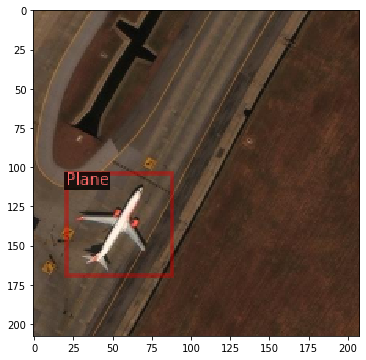

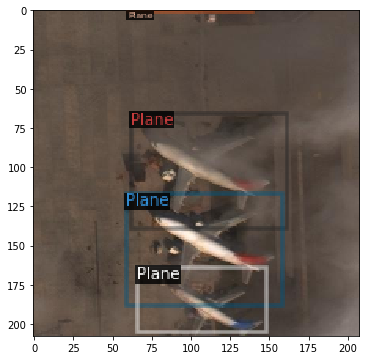

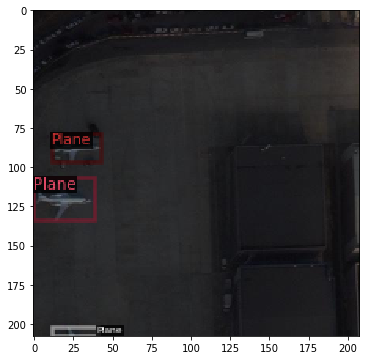

In [45]:
train_dicts = get_coco_json('datasets/planes/plane_train_images/')

for d in random.sample(train_dicts, 3):
        file_name = d['file_name']
        img = cv2.imread(file_name)
        plt.figure(figsize=(6,6))
        visualizer = Visualizer(img[:, :, ::-1], metadata=plane_metadata, scale=0.5)
        vis = visualizer.draw_dataset_dict(d)
        plt.imshow(vis.get_image())

### Train 

In [ ]:
# dataset_dicts = get_balloon_dicts("balloon/train")
# dataset_dicts

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("plane_train", {}, "plane_train.json", "./")
register_coco_instances("plane_test", {}, "plane_test.json", "./")

In [46]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("plane_train_images",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/12 15:50:38 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[03/12 15:50:38 d2.data.build]: Removed 0 images with no usable annotations. 393 images left.
[03/12 15:50:38 d2.data.common]: Serializing 393 elements to byte tensors and concatenating them all ...
[03/12 15:50:38 d2.data.common]: Serialized dataset takes 0.11 MiB
[03/12 15:50:38 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[03/12 15:50:38 d2.data.build]: Using training sampler TrainingSampler


/home/ratpac/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ratpac/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ratpac/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ratpac/anaconda3/lib/python3.7/site-packages/tensorboar

[03/12 15:50:39 d2.engine.train_loop]: Starting training from iteration 0
ERROR [03/12 15:50:39 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/home/ratpac/eddie/sprint_5/od_models/detectron2/detectron2/engine/train_loop.py", line 132, in train
    self.run_step()
  File "/home/ratpac/eddie/sprint_5/od_models/detectron2/detectron2/engine/train_loop.py", line 215, in run_step
    loss_dict = self.model(data)
  File "/home/ratpac/anaconda3/lib/python3.7/site-packages/torch/nn/modules/module.py", line 541, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ratpac/eddie/sprint_5/od_models/detectron2/detectron2/modeling/meta_arch/rcnn.py", line 124, in forward
    proposals, proposal_losses = self.proposal_generator(images, features, gt_instances)
  File "/home/ratpac/anaconda3/lib/python3.7/site-packages/torch/nn/modules/module.py", line 541, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ratpac/eddie/s

ImportError: libcudart.so.9.2: cannot open shared object file: No such file or directory

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("plane_test", )
predictor = DefaultPredictor(cfg)